#**NATURAL LANGUAGE PROCESSING FOR ADVANCING CLIMATE CHANGEASSESSMENT AND POLICY DECISION MAKING**

###*DIBYA PANDEY*
###*NAVEEN DONTHULA*
###*SNIGDHA CHIGURUPATI*

##*DATA 690 - NLP FOR PRACTIONERS*
##*PROF. ANTONIO DIANA*


###*CLIMATE CHANGE : USA-WEST*

###**Importing Required Libraries**

In [1]:
!pip install -q vaderSentiment
import plotly.express as px
import plotly.graph_objects as go
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from heapq import nlargest
punctuations = string.punctuation
from spacy.language import Language
import networkx as nx
import matplotlib.pyplot as plt
import nltk
import re
import numpy as np
nltk.download('punkt')
from nltk import sent_tokenize
from os import path
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
nlp = English()
nlp.add_pipe('sentencizer')
parser = English()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import gensim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


###**Reading the input text file**

In [2]:
with open('/content/sample_data/west_usa.txt', 'r') as file:
    text = file.read().replace('\n', '')

###**TEXT SUMMARIZATION**

In [3]:
 #definig sentence importances
def sentences_importance(text, normalised_dict):
    importance ={}
    for sentence in nlp(text).sents:
        for token in sentence:
            target_token = token.text.lower()
            if target_token in normalised_dict.keys():
                if sentence in importance.keys():
                    importance[sentence]+=normalised_dict[target_token]
                else:
                    importance[sentence]=normalised_dict[target_token]
    return importance

In [4]:
#Generating number vectors
def generate_numbers_vector(tokens):
    frequency = [tokens.count(token) for token in tokens]
    token_dict = dict(list(zip(tokens,frequency)))
    maximum_frequency=sorted(token_dict.values())[-1]
    normalised_dict = {token_key:token_dict[token_key]/maximum_frequency for token_key in token_dict.keys()}
    return normalised_dict

In [5]:
#Define the preprocess function
def pre_process(document):
    clean_tokens = [token.lemma_.lower().strip() for token in document]
    clean_tokens = [token for token in clean_tokens if token not in STOP_WORDS and token not in punctuations]
    tokens = [token.text for token in document]
    lower_case_tokens = list(map(str.lower, tokens))
    return " ".join(lower_case_tokens)

In [6]:
#defining to generate summary
def generate_summary(rank, text):
    target_document = parser(text)
    importance = sentences_importance(text, generate_numbers_vector(pre_process(target_document)))
    summary = nlargest(rank, importance, key=importance.get)
    return summary

In [7]:
# Save the summary
num_sentences_to_generate = 10
summary=(generate_summary(num_sentences_to_generate, text))

# Filename is complete path to file plus name and .txt extension
file = open('summary.txt', 'w')
file.write(str(summary))
file.close()

In [8]:
summary

[Not a single individual, community, city or government can opt out,” South African co-chair Roberts said in a Monday press conference. “,
 Phoenix has had a record-shattering 25 straight days of temperatures at or above 110 degrees Fahrenheit (43.3 degrees Celsius) and more than a week when the nighttime temperature never dropped below 90 degrees Fahrenheit (32.2 Celsius)The heat in Spain, Italy, Greece and some Balkan states is likely to reoccur every decade in the current climate, the study said.,
 The way scientists do these rapid analyses is by comparing observations of current weather in the three regions to repeated computer simulations of “a world that might have been without climate change,” said study co-author Izidine Pinto, a climate scientist at the Royal Netherlands Meteorological Institute.,
 Delaying cuts in heat-trapping carbon emissions and waiting on adapting to warming’s impacts, it warns, “will miss a brief and rapidly closing window of opportunity to secure a live

###**SENTIMENT ANALYSIS**

In [9]:
analyzer=SentimentIntensityAnalyzer()
summary_text = str(summary)
res=analyzer.polarity_scores(summary_text)
print(res)

{'neg': 0.057, 'neu': 0.873, 'pos': 0.07, 'compound': 0.5106}


In [10]:
# Finding the subjectivity
from textblob import TextBlob

blob = TextBlob(summary_text)

# Calculate subjectivity
subjectivity = blob.sentiment.subjectivity

# Print the subjectivity score
print("Subjectivity:", subjectivity)

# Interpret the subjectivity score
if subjectivity < 0.5:
    print("The text is more objective.")
else:
    print("The text is more subjective.")

Subjectivity: 0.47928447420634923
The text is more objective.


In [11]:
pos = res["pos"]
neu = res["neu"]
neg = res["neg"]
print(f'The percentage of positive sentiment is {round(pos*100,2)}%')
print(f'The percentage of neutral sentiment is {round(neu*100,2)}%')
print(f'The percentage of negative sentiment is {round(neg*100,2)}%')


The percentage of positive sentiment is 7.0%
The percentage of neutral sentiment is 87.3%
The percentage of negative sentiment is 5.7%


In [12]:
# get polarity scores
neg, pos, neu = [],[],[]
for i, val in res.items():
    #ss = sia.polarity_scores(str(mylist))
    neg.append(res['neg'])
    pos.append(res['pos'])
    neu.append(res['neu'])
res['neg'] = neg
res['pos'] = pos
res['neu'] = neu

In [13]:
fig = px.scatter_ternary(res, a="neu", b="pos", c="neg")
fig.show()


###**NAMED ENTITY RECOGNITION**

In [14]:
# Load the spaCy model for NER
nlp_model = "en_core_web_sm"
nlp = spacy.load(nlp_model)

In [15]:
# Read the content from the summaryl file
with open("summary.txt", "r") as file:
    document_content = file.read()

In [16]:
# Function for Named Entity Recognition
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Perform Named Entity Recognition on the preprocessed content
extracted_entities = perform_ner(document_content)

# Print the extracted named entities and their labels
print("Named Entities:")
for entity, label in extracted_entities:
    print(f"{entity} - {label}")

Named Entities:
South African - NORP
Roberts - PERSON
Monday - DATE
Phoenix - GPE
25 straight days - DATE
110 degrees - QUANTITY
Fahrenheit - WORK_OF_ART
43.3 degrees - QUANTITY
more than a week - DATE
90 degrees - QUANTITY
32.2 - CARDINAL
Spain - GPE
Italy - GPE
Greece - GPE
Balkan - NORP
every decade - DATE
three - CARDINAL
Izidine Pinto - PERSON
the Royal Netherlands Meteorological Institute - ORG
2015 - DATE
Paris - GPE
1.5 degrees - QUANTITY
2.7 degrees - QUANTITY
Fahrenheit - WORK_OF_ART
2018 - DATE
1.5 degree - QUANTITY
a few more tenths - QUANTITY
month - DATE
Otto - PERSON
One - CARDINAL
only a few decades - DATE
Today’s IPCC - WORK_OF_ART
United Nations - ORG
Antonio Guterres - PERSON


###**TOPIC MODELING**

In [17]:
with open("summary.txt", "r") as file:
    data = file.read()

# Tokenize the data into sentences (or other appropriate document units)
documents = sent_tokenize(str(data))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# convert the text to a tf-idf weighted term-document matrix
vectorizer = TfidfVectorizer(max_features=2000, min_df=1, stop_words='english')
X = vectorizer.fit_transform(documents)
idx_to_word = np.array(vectorizer.get_feature_names_out())

# apply NMF
nmf = NMF(n_components=5, solver="cd")
W = nmf.fit_transform(X)
H = nmf.components_
# print the topics
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-20:]]])))


Topic 1: limiting,dropped,liveable,delaying,mark,future,warming,temperature,world,degree,study,current,ipcc,heat,celsius,fahrenheit,report,said,climate,degrees
Topic 2: decades,degree,degrees,delaying,designed,filled,emergency,world,emphasizes,exceeding,fahrenheit,failed,emissions,patient,example,mean,spraying,water,blows,fan
Topic 3: emissions,dropped,world,example,emphasizes,degrees,said,government,press,individual,conference,roberts,african,city,monday,community,single,opt,south,chair
Topic 4: emphasizes,example,patient,cool,filled,quickly,immersing,ice,honed,needing,medical,turned,designed,person,possible,emergency,bag,team,technique,body
Topic 5: emergency,dropped,world,emissions,emphasizes,example,said,chair,south,opt,single,community,monday,city,african,roberts,conference,individual,press,government


In [18]:
def display_topics(model, features, no_top_words=20):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # Invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            word = features[largest[i]]
            weight = abs(words[largest[i]] * 100.0 / total)
            print("  %s (%2.2f)" % (word, weight))

In [19]:
# Call the display_topics function to show the topics
display_topics(nmf, idx_to_word)


Topic 00
  degrees (3.33)
  climate (2.66)
  said (2.10)
  report (2.00)
  fahrenheit (2.00)
  celsius (2.00)
  heat (2.00)
  ipcc (1.33)
  current (1.33)
  study (1.33)
  degree (1.33)
  world (1.33)
  temperature (1.33)
  warming (1.33)
  future (0.67)
  mark (0.67)
  delaying (0.67)
  liveable (0.67)
  dropped (0.67)
  limiting (0.67)

Topic 01
  fan (14.73)
  blows (14.73)
  water (14.73)
  spraying (14.73)
  mean (14.73)
  example (14.73)
  patient (11.61)
  emissions (0.00)
  failed (0.00)
  fahrenheit (0.00)
  exceeding (0.00)
  emphasizes (0.00)
  world (0.00)
  emergency (0.00)
  filled (0.00)
  designed (0.00)
  delaying (0.00)
  degrees (0.00)
  degree (0.00)
  decades (0.00)

Topic 02
  chair (8.99)
  south (8.77)
  opt (8.75)
  single (8.26)
  community (8.02)
  monday (7.51)
  city (6.99)
  african (6.79)
  roberts (6.77)
  conference (6.62)
  individual (6.54)
  press (6.33)
  government (6.12)
  said (3.53)
  degrees (0.00)
  emphasizes (0.00)
  example (0.00)
  world 

###**WORD FREQUENCY ANALYSIS**

Word Frequency: Counter({'degrees': 5, 'climate': 4, 'Fahrenheit': 3, 'report': 3, 'Celsius': 2, 'temperature': 2, 'heat': 2, 'current': 2, 'study': 2, 'said': 2, 'world': 2, '15': 2, 'IPCC': 2, 'degree': 2, 'even': 2, 'patient': 2, 'Not': 1, 'single': 1, 'individual': 1, 'community': 1, 'city': 1, 'government': 1, 'out': 1, 'South': 1, 'African': 1, 'cochair': 1, 'Roberts': 1, 'Monday': 1, 'press': 1, 'conference': 1, 'Phoenix': 1, 'recordshattering': 1, '25': 1, 'straight': 1, 'days': 1, 'temperatures': 1, '110': 1, '433': 1, 'week': 1, 'nighttime': 1, 'dropped': 1, '90': 1, '322': 1, 'CelsiusThe': 1, 'Spain': 1, 'Italy': 1, 'Greece': 1, 'Balkan': 1, 'states': 1, 'reoccur': 1, 'every': 1, 'decade': 1, 'way': 1, 'scientists': 1, 'rapid': 1, 'analyses': 1, 'comparing': 1, 'observations': 1, 'weather': 1, 'three': 1, 'regions': 1, 'repeated': 1, 'computer': 1, 'simulations': 1, 'a': 1, 'might': 1, 'without': 1, 'change': 1, 'coauthor': 1, 'Izidine': 1, 'Pinto': 1, 'scientist': 1, 'Royal

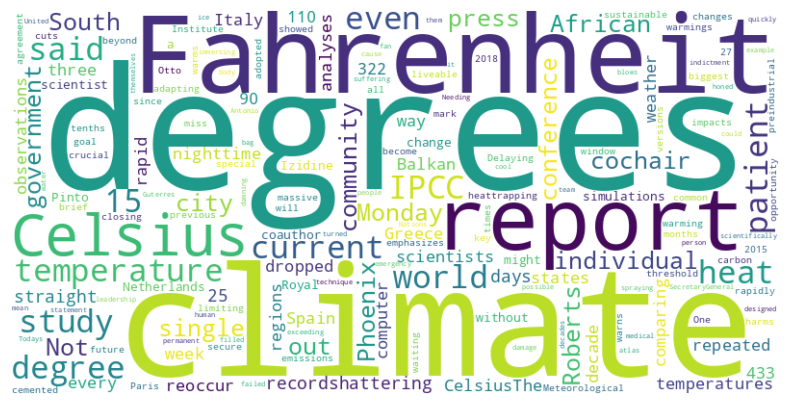

In [43]:
# Get a list of stopwords
stop_words = set(stopwords.words("english"))
additional_stop_words = ['said','not','opt','likely','never','out']
stop_words.update(additional_stop_words)

# Read the content from the "summary.txt" file
with open("summary.txt", "r") as file:
    summary = file.read()

# Tokenize the summary
word_tokens = summary.split()

# Remove non-alphanumeric characters and filter out stopwords
filtered_words = [re.sub(r'\W+', '', word) for word in word_tokens if word.lower() not in stop_words and re.sub(r'\W+', '', word) != '']

# Calculate word frequencies
word_freq = Counter(filtered_words)

# Print word frequencies
print("Word Frequency:", word_freq)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###**WORD EMBEDDINGS**

In [21]:
stop_words = set(stopwords.words("english"))
# Define your list of additional stop words
additional_stop_words = ['team','single','via','miss','']
stop_words.update(additional_stop_words)

# Read the content from the original file (e.g., "summary.txt")
with open("summary.txt", "r") as file:
    summary = file.read()

#Preprocess the summary and tokenize it
tokenized_summary = simple_preprocess(summary)
processed_summary = [word for word in tokenized_summary if word not in stop_words]

# Train the Word2Vec model with tokenized sentences
model = Word2Vec(sentences=[processed_summary], vector_size=100, window=5, min_count=1, workers=4)

# Get the word embeddings for specific words
word_embeddings = {word: model.wv[word] for word in tokenized_summary if word in model.wv}

# Convert word embeddings to a 2D array
word_vectors_2d = np.array([model.wv[word] for word in word_embeddings])

# Reduce the dimensionality using t-SNE with reduced perplexity
perplexity_value = min(30, len(word_embeddings) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_2d)

# Create a DataFrame to hold the 2D coordinates and word labels
df = pd.DataFrame(word_vectors_2d, columns=['Dimension 1', 'Dimension 2'])
df['Word'] = list(word_embeddings.keys())

# Create the scatter plot using Plotly
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', text='Word', title='Word Embeddings Scatter Plot')

# Customize the layout
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

In [22]:
# Create an empty figure
fig = go.Figure()

# Define colors
colors = px.colors.qualitative.Plotly

# Loop through each word embedding and add a scatter trace for it
for i, word in enumerate(df['Word']):
    fig.add_trace(go.Scatter(x=[df['Dimension 1'][i]], y=[df['Dimension 2'][i]],
                             mode='markers',
                             name=word,  # Legend label
                             marker_color=colors[i % len(colors)])) # Use different colors

# Customize the layout
fig.update_layout(title='Word Embeddings Scatter Plot',
                  xaxis_title='Dimension 1',
                  yaxis_title='Dimension 2',
                  legend_title='Words',
                  legend=dict(orientation="v",  # Vertical orientation
                              yanchor="top",
                              y=1.02,
                              xanchor="left",
                              x=1)  # Position outside the plot
                  )

# Show the plot
fig.show()


<ipython-input-23-b0ce725a4322>:24: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



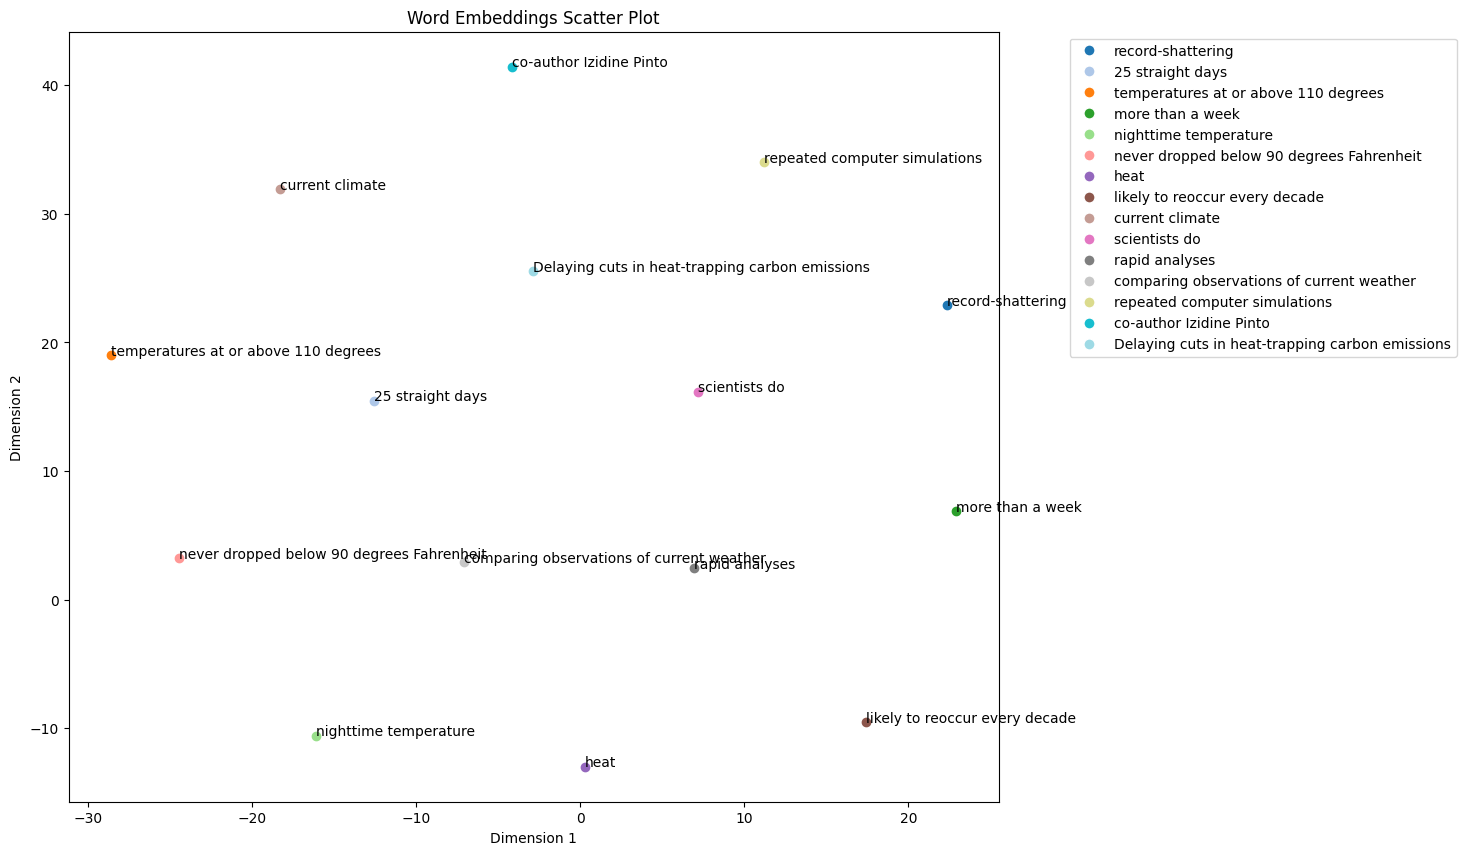

In [23]:
keywords_summary = [
    'record-shattering','25 straight days','temperatures at or above 110 degrees','more than a week','nighttime temperature','never dropped below 90 degrees Fahrenheit','heat','likely to reoccur every decade',
    'current climate','scientists do','rapid analyses','comparing observations of current weather','repeated computer simulations','co-author Izidine Pinto','Delaying cuts in heat-trapping carbon emissions'
]

# Train the Word2Vec model with tokenized sentences
model = Word2Vec(sentences=[keywords_summary], vector_size=100, window=5, min_count=1, workers=4)

# Get the word embeddings for specific words
word_embeddings = {word: model.wv[word] for word in keywords_summary if word in model.wv}

# Convert word embeddings to a 2D array
word_vectors_2d = np.array([model.wv[word] for word in word_embeddings])

# Reduce the dimensionality using t-SNE with reduced perplexity
perplexity_value = min(30, len(word_embeddings) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_2d)

# Create the scatter plot
plt.figure(figsize=(12, 10))

# Loop through each unique word and plot it with a different color
colors = plt.cm.get_cmap('tab20', len(word_embeddings.keys()))
for i, (word, color) in enumerate(zip(word_embeddings.keys(), colors.colors)):
  plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], color=color)
  plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=10)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings Scatter Plot')

# Create a legend with labels and corresponding colors
labels = word_embeddings.keys()
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=8) for label, color in zip(labels, colors.colors)]
plt.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

###**KNOWLEDGE GRAPH**

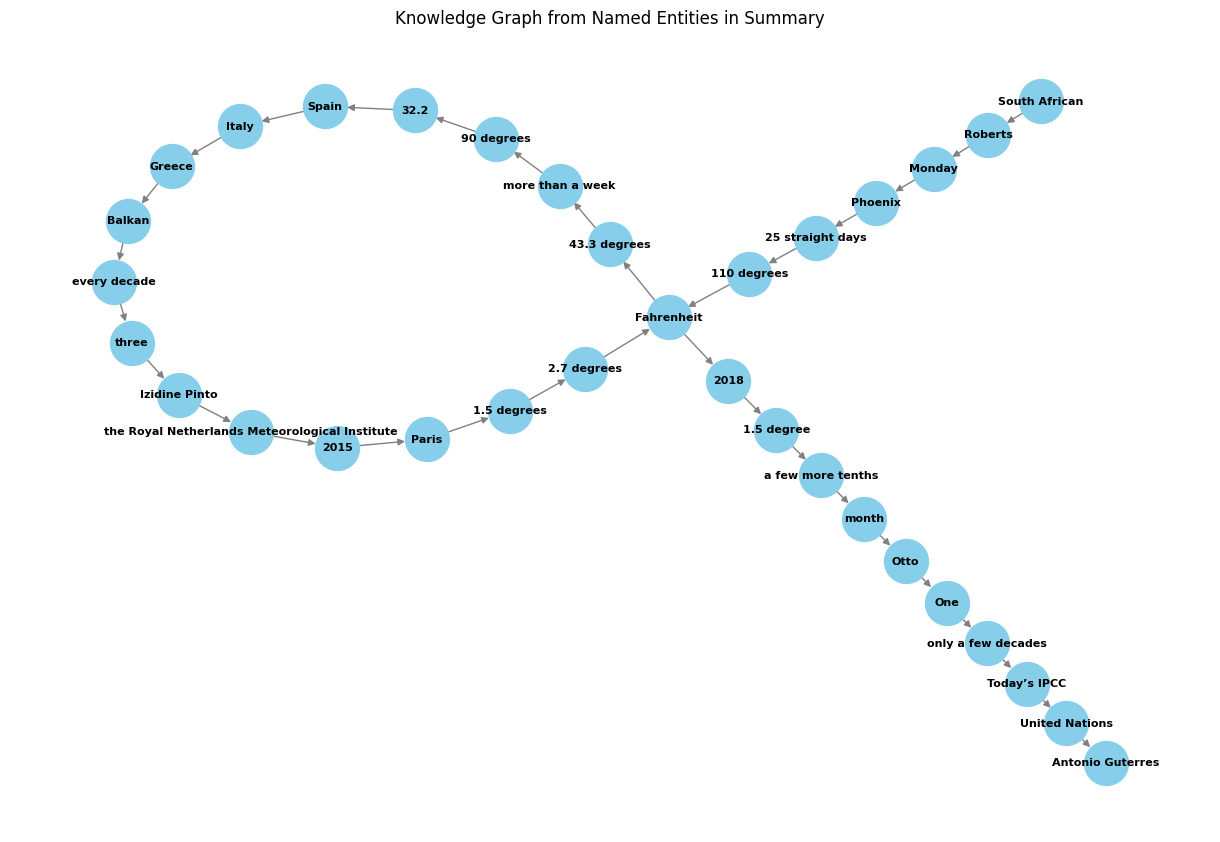

In [24]:
# Load the spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Process the summary with spaCy
doc = nlp(summary)

# Create a directed graph
G = nx.DiGraph()

# Extract named entities
entities = list(doc.ents)

# Add nodes for named entities
for ent in entities:
    G.add_node(ent.text, type=ent.label_)

# Connect named entities in the order they appear
for i in range(len(entities) - 1):
    prev_ent = entities[i]
    next_ent = entities[i + 1]
    G.add_edge(prev_ent.text, next_ent.text)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_weight='bold', node_color='skyblue', edge_color='gray')
plt.title("Knowledge Graph from Named Entities in Summary")
plt.show()


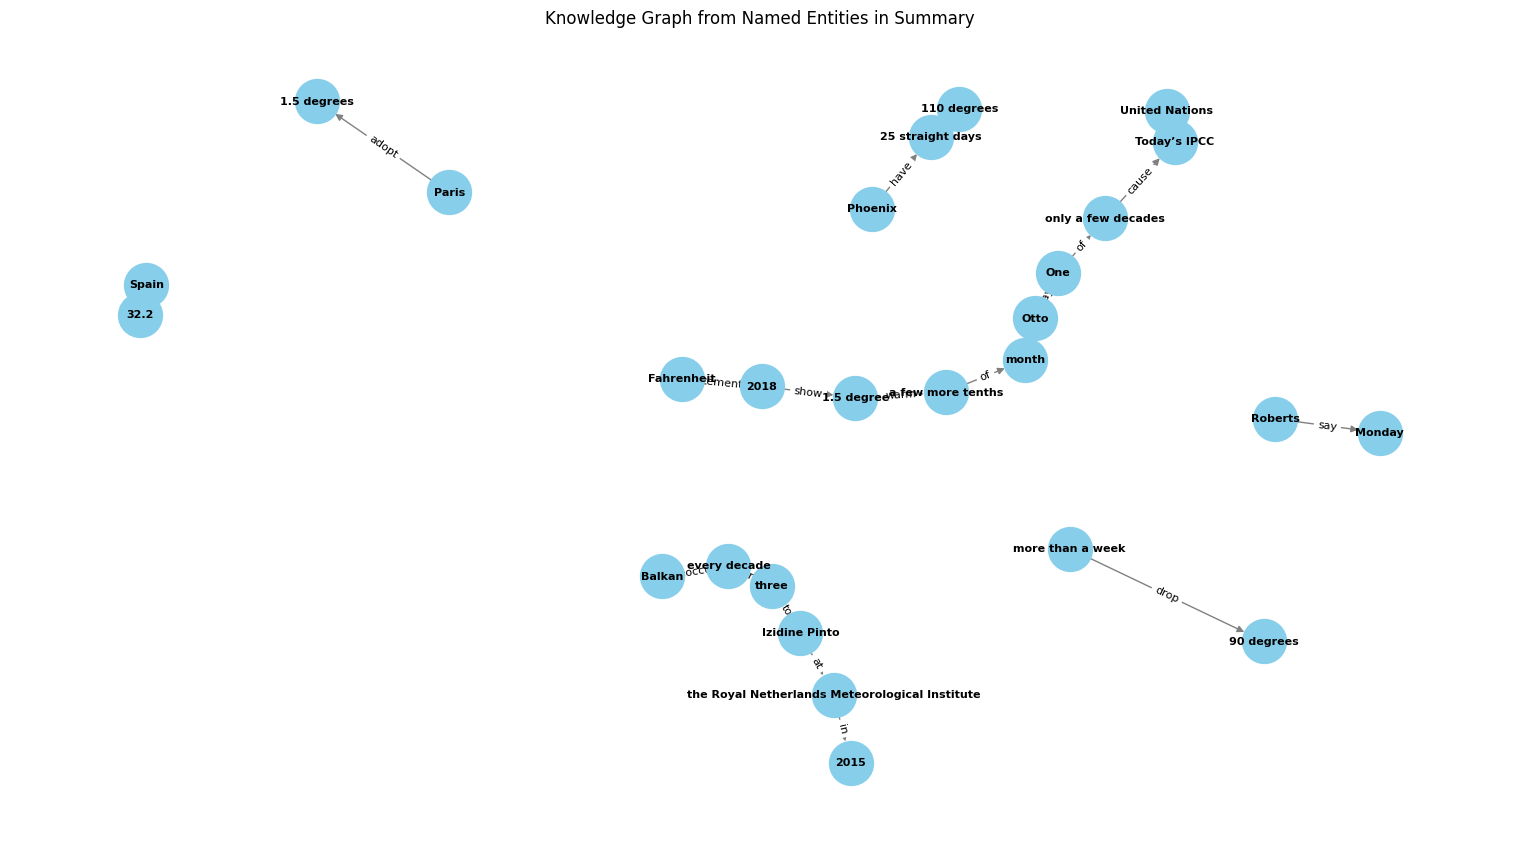

In [25]:
def find_relationship(start_ent, end_ent):
    # Check if start_ent comes before end_ent
    if start_ent.start < end_ent.start:
        tokens_between = [t for t in doc[start_ent.end:end_ent.start]]
    else:
        tokens_between = [t for t in doc[end_ent.end:start_ent.start]]

    # Find the first verb or preposition token between the entities
    for token in tokens_between:
        if token.pos_ in ('VERB', 'ADP'):
            return token.lemma_
    return None

# Load the spaCy NLP model
nlp = spacy.load("en_core_web_sm")
# Assuming `summary` contains the text of your summary
doc = nlp(summary)

# Create a directed graph
G = nx.DiGraph()

# Extract named entities
entities = list(doc.ents)

# Add nodes for named entities and edges with labels
for i in range(len(entities) - 1):
    prev_ent = entities[i]
    next_ent = entities[i + 1]
    relationship = find_relationship(prev_ent, next_ent)
    if relationship:
        G.add_edge(prev_ent.text, next_ent.text, label=relationship)

# Draw the graph with edge labels
plt.figure(figsize=(15, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_weight='bold', node_color='skyblue', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['label'] for u, v in G.edges()}, font_size=8)
plt.title("Knowledge Graph from Named Entities in Summary")
plt.show()


###**HIERARCHICAL CLUSTERING**

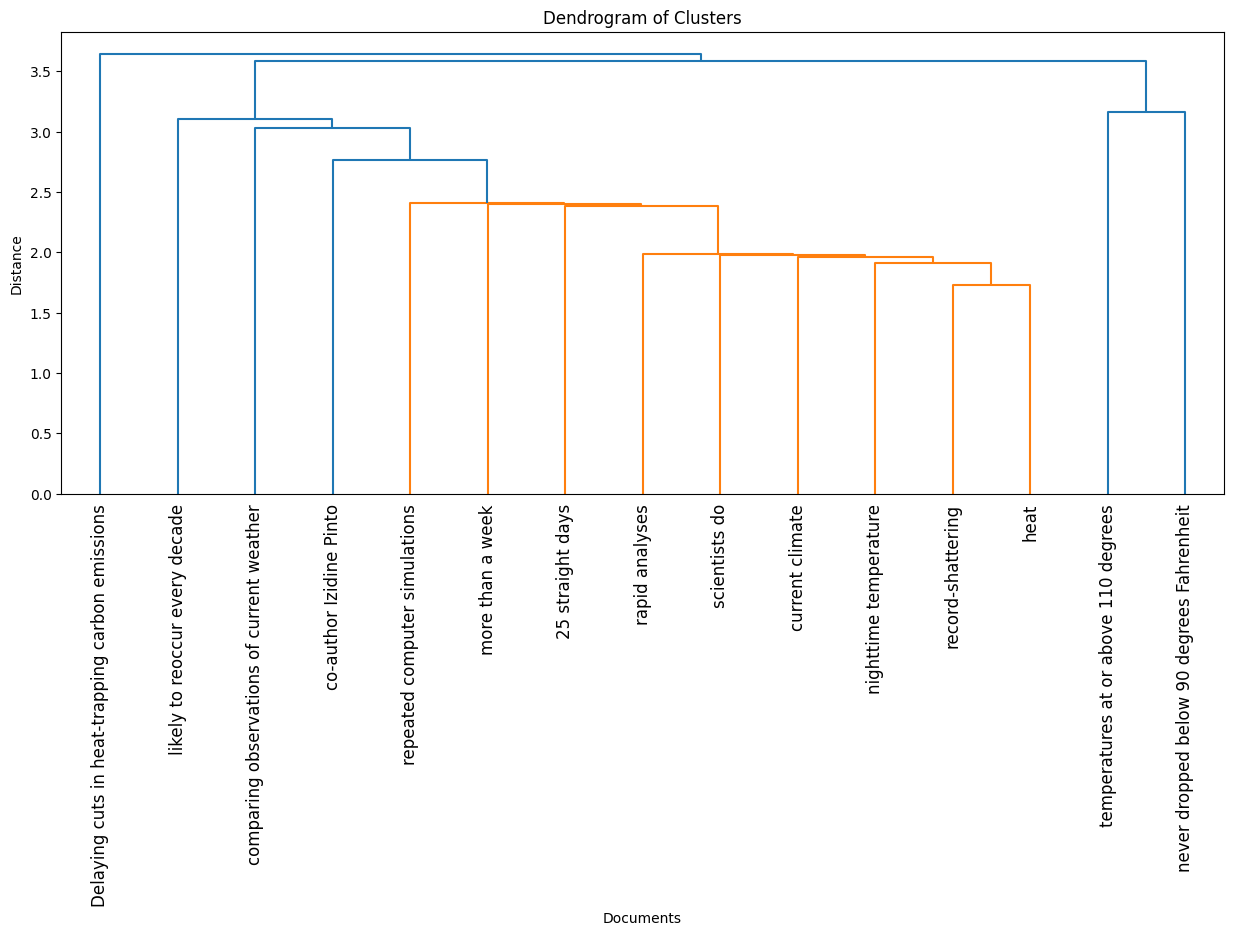

In [26]:
# Create a CountVectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(keywords_summary)

# Perform Agglomerative Clustering
n_clusters = 3  # You can adjust the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = clustering.fit_predict(X.toarray())

# Create and plot the dendrogram
plt.figure(figsize=(15, 6))
linkage_matrix = linkage(X.toarray(), method='ward')
dendrogram(linkage_matrix, labels=keywords_summary, orientation='top')
plt.title("Dendrogram of Clusters")
plt.ylabel("Distance")
plt.xlabel("Documents")
plt.xticks(rotation=90)
plt.show()


###**PREDICTIVE ANALYTICS BASED ON SENTIMENT**

In [27]:
num_sentences_to_generate = 50
summary_pa=(generate_summary(num_sentences_to_generate, text))
summary_pa

[Not a single individual, community, city or government can opt out,” South African co-chair Roberts said in a Monday press conference.,
 Phoenix has had a record-shattering 25 straight days of temperatures at or above 110 degrees Fahrenheit (43.3 degrees Celsius) and more than a week when the nighttime temperature never dropped below 90 degrees Fahrenheit (32.2 Celsius)The heat in Spain, Italy, Greece and some Balkan states is likely to reoccur every decade in the current climate, the study said.,
 The way scientists do these rapid analyses is by comparing observations of current weather in the three regions to repeated computer simulations of “a world that might have been without climate change,” said study co-author Izidine Pinto, a climate scientist at the Royal Netherlands Meteorological Institute.,
 Delaying cuts in heat-trapping carbon emissions and waiting on adapting to warming’s impacts, it warns, “will miss a brief and rapidly closing window of opportunity to secure a liveab

In [28]:
# Saving the generated summary to a file
with open("predictive_analysis.txt", 'w') as file:
    file.write(str(summary_pa))

In [29]:
# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Read the summary from a file
with open("predictive_analysis.txt", 'r') as file:
    summary_pa = file.read()

# Remove brackets and extra commas
summary_pa = summary_pa.replace('[', '').replace(']', '')
summary_pa = re.sub(',\s*,', ',', summary_pa)

# Process the text with spaCy
doc = nlp(summary_pa)

sia = SentimentIntensityAnalyzer()

data = []
for sent in doc.sents:
    sentence = sent.text.strip()  # Remove leading and trailing whitespace
    if sentence.startswith(','):
        sentence = sentence[1:].strip()

    # Skip adding the row if the sentence is empty
    if sentence == '':
        continue

    sentiment_score = sia.polarity_scores(sentence)
    compound_score = sentiment_score['compound']

    # Classify sentiment as positive, neutral, or negative
    if compound_score >= 0.3:
        sentiment_label = "positive"
    elif compound_score <= -0.3:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"

    data.append((sentence, compound_score, sentiment_label))

df = pd.DataFrame(data, columns=['sentence', 'compound_score', 'sentiment_label'])
df


,sentence,compound_score,sentiment_label
0,"Not a single individual, community, city or go...",0.4404,positive
1,"In the 2015 Paris agreement, the world adopted...",0.5106,positive
2,"If it warms a few more tenths of a degree, thi...",-0.1265,neutral
3,Since the last version of this impacts panel’s...,-0.9243,negative
4,"A stagnant atmosphere, warmed by carbon dioxid...",0.7269,positive
5,"It is likely going to make the world sicker, h...",-0.6590,negative
6,The UN Intergovernmental Panel on Climate Chan...,-0.7184,negative
7,"In 2022, we saw 425 deaths, and that was a 25%...",-0.6249,negative
8,"Since 2008, weather disasters have forced abou...",-0.8442,negative
9,"Monday’s 36-page summary, condensed from more ...",0.3919,positive


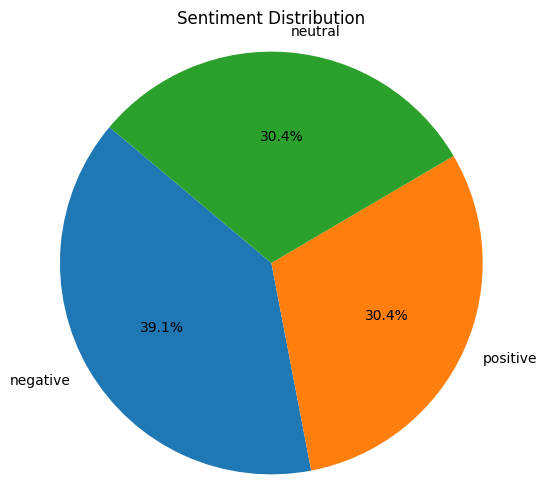

In [30]:
# Count the number of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [31]:
X = df[['compound_score']]
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
clf1 = make_pipeline(StandardScaler(), LogisticRegression())
clf2 = RandomForestClassifier(random_state=42)
clf3 = make_pipeline(StandardScaler(), SVC(probability=True))  # Enable probability estimates

meta_clf = LogisticRegression()
stacking_clf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                                  meta_classifier=meta_clf,
                                  use_probas=True,
                                  average_probas=False)

stacking_clf.fit(X_train, y_train)

StackingClassifier(classifiers=[Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('logisticregression',
                                                 LogisticRegression())]),
                                RandomForestClassifier(random_state=42),
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(probability=True))])],
                   meta_classifier=LogisticRegression(), use_probas=True)

In [33]:
# Make predictions on the test data
y_pred = stacking_clf.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8
Precision: 1.0
Recall: 0.8
F1 Score: 0.8800000000000001
